In [11]:
from pathlib import Path

Path("DATA").mkdir(exist_ok=True)
Path("cleaned").mkdir(exist_ok=True)


In [2]:
## Download Dataset and place it in the DATA folder 
## Link: https://www.kaggle.com/datasets/chethuhn/network-intrusion-dataset?resource=download

In [1]:
# --- Step 1: Merge all CSV files from the given directory ---
import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [3]:

path = r'./DATA'

# Find all CSV files in the folder
all_files = glob.glob(os.path.join(path, "*.csv"))

print(f"\nSearching for CSV files in: {path}")
print(f" Total files found: {len(all_files)}")

if not all_files:
    print(" No CSV files found. Please check your path.")
else:
    # Read and combine all CSVs into a single DataFrame
    df_list = [pd.read_csv(f, encoding='latin1', low_memory=False) for f in all_files]
    merged_df = pd.concat(df_list, ignore_index=True)

    # Clean column names (optional but useful)
    merged_df.rename(columns=lambda x: x.strip(), inplace=True)

    # Display merge summary
    print("\n Successfully merged all files.")
    print("-------------------------------------------")
    print(f"Number of files merged: {len(all_files)}")
    print(f"Final dataset shape: {merged_df.shape}")
    print("-------------------------------------------")
    display(merged_df.head())



Searching for CSV files in: ./DATA
 Total files found: 8

 Successfully merged all files.
-------------------------------------------
Number of files merged: 8
Final dataset shape: (2830743, 79)
-------------------------------------------


,Destination Port,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,54865,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,55054,109,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,55055,52,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,46236,34,1,1,6,6,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,54863,3,2,0,12,0,6,6,6.0,0.0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [4]:

output_filename = 'cleaned/merged_cicids_dataset.csv'

print(f"\n Saving merged dataset to '{output_filename}'...")
merged_df.to_csv(output_filename, index=False)

print(f" Successfully saved as '{output_filename}'")
file_size = os.path.getsize(output_filename) / (1024 * 1024)  # MB
print(f" File size: {file_size:.2f} MB")



 Saving merged dataset to 'cleaned/merged_cicids_dataset.csv'...
 Successfully saved as 'cleaned/merged_cicids_dataset.csv'
 File size: 921.45 MB


In [ ]:
# If You are runnng low on ram Restart the kernel and run only the code from this cell onward

import os
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

 Successfully loaded cleaned dataset.
Shape of the dataset (rows, columns): (2830743, 79)

 Cleaned up column names.

Number of infinite values before cleaning: 4376
Number of NaN values before cleaning: 1358

 Replaced infinite values and dropped all rows with NaN values.
Number of rows removed: 2867
Shape of dataset after cleaning: (2827876, 79)

--- Analysis of the 'Label' Column ---
Distribution of traffic types:
Label
BENIGN                          2271320
DoS Hulk                         230124
PortScan                         158804
DDoS                             128025
DoS GoldenEye                     10293
FTP-Patator                        7935
SSH-Patator                        5897
DoS slowloris                      5796
DoS Slowhttptest                   5499
Bot                                1956
Web Attack ï¿½ Brute Force         1507
Web Attack ï¿½ XSS                  652
Infiltration                         36
Web Attack ï¿½ Sql Injection         21
Heartbleed   

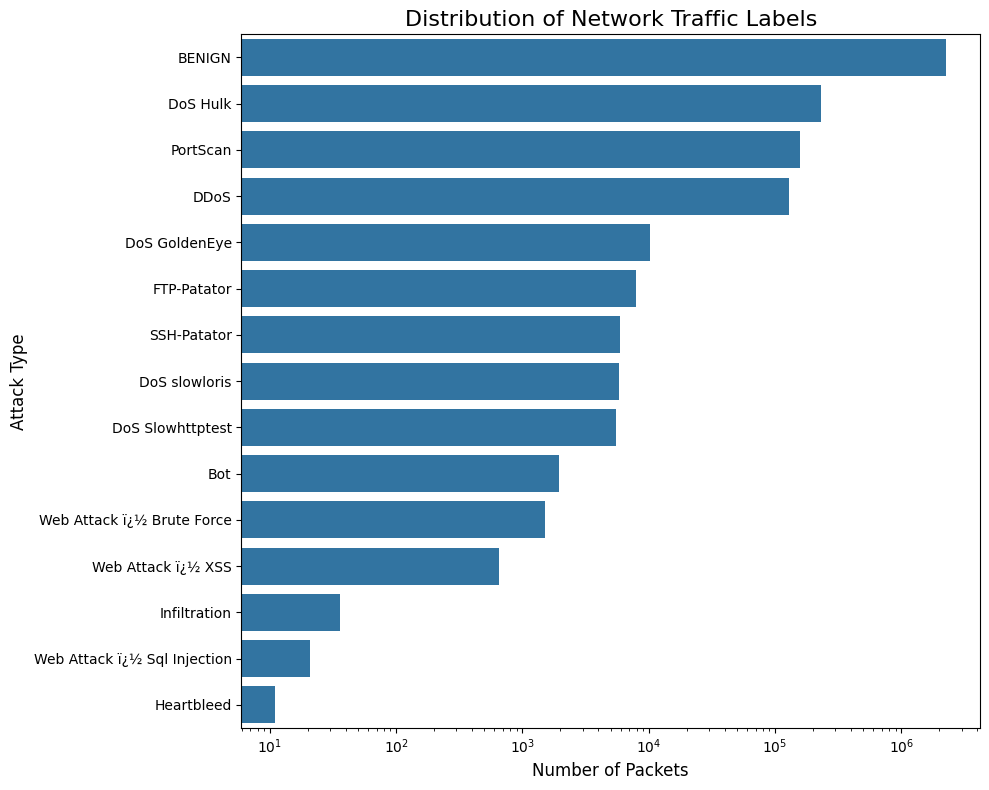


 Notice the extreme class imbalance — 'BENIGN' traffic dominates the dataset.


In [4]:

# 2. Load the cleaned dataset
df = pd.read_csv('cleaned/merged_cicids_dataset.csv')
print(" Successfully loaded cleaned dataset.")
print("Shape of the dataset (rows, columns):", df.shape)

# 3. Clean up column names
df.rename(columns=lambda x: x.strip(), inplace=True)
print("\n Cleaned up column names.")

# 4. Handle corrupted data (Infinite and NaN values)
numeric_cols = df.select_dtypes(include=np.number)
infinite_values_count = np.isinf(numeric_cols.values).sum()

print(f"\nNumber of infinite values before cleaning: {infinite_values_count}")
print(f"Number of NaN values before cleaning: {df.isnull().sum().sum()}")

df.replace([np.inf, -np.inf], np.nan, inplace=True)
rows_before = df.shape[0]
df.dropna(inplace=True)
rows_after = df.shape[0]

print("\n Replaced infinite values and dropped all rows with NaN values.")
print(f"Number of rows removed: {rows_before - rows_after}")
print("Shape of dataset after cleaning:", df.shape)

# 5. Analysis of the 'Label' column
print("\n--- Analysis of the 'Label' Column ---")
label_counts = df['Label'].value_counts()
print("Distribution of traffic types:")
print(label_counts)

# 6. Visualize class distribution
plt.figure(figsize=(10, 8))
sns.barplot(y=label_counts.index, x=label_counts.values)
plt.title('Distribution of Network Traffic Labels', fontsize=16)
plt.xlabel('Number of Packets', fontsize=12)
plt.ylabel('Attack Type', fontsize=12)
plt.xscale('log')
plt.tight_layout()
plt.show()

print("\n Notice the extreme class imbalance — 'BENIGN' traffic dominates the dataset.")


In [5]:
# If the label is 'BENIGN' → 0 (normal traffic)
# Else → 1 (any type of attack)
df['is_malicious'] = np.where(df['Label'] == 'BENIGN', 0, 1)

print(" Created binary target column 'is_malicious'.")
print("Value counts for 'is_malicious':")
print(df['is_malicious'].value_counts())

# Drop both 'Label' and 'is_malicious' to keep only numeric features for ML
X = df.drop(['Label', 'is_malicious'], axis=1)
y = df['is_malicious']

print("\n Defined features (X) and target (y).")
print("Feature matrix shape:", X.shape)
print("Target vector shape:", y.shape)

# Stratify=y ensures equal class distribution across both sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("\n Split data into training and testing sets successfully.")
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))
print("\nThe 'X_train', 'y_train', 'X_test', and 'y_test' variables are now ready for model training!")


 Created binary target column 'is_malicious'.
Value counts for 'is_malicious':
is_malicious
0    2271320
1     556556
Name: count, dtype: int64

 Defined features (X) and target (y).
Feature matrix shape: (2827876, 78)
Target vector shape: (2827876,)

 Split data into training and testing sets successfully.
Training set size: 2262300
Testing set size: 565576

The 'X_train', 'y_train', 'X_test', and 'y_test' variables are now ready for model training!


In [6]:
# --- Step 4: Advanced Feature Selection using Random Forest Importance ---

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

class AdvancedFeatureSelector:
    """
    A utility class for feature importance–based dimensionality reduction
    using a RandomForestClassifier. It allows:
    1. Computing all feature importances once.
    2. Analyzing information retention for various feature counts.
    3. Selecting top-N features and transforming data accordingly.
    """

    def __init__(self):
        """Initialize internal variables."""
        self.selector_model = None
        self.full_feature_importances_ = None
        self.selected_features_ = None
        self.cumulative_importance_ = None
        self._is_fitted = False

    def fit(self, X, y):
        """
        Learn feature importances from all features using RandomForestClassifier.
        This is the most computationally expensive step, done once.
        
        Args:
            X (pd.DataFrame): Training feature matrix (unscaled).
            y (pd.Series): Training labels.
        """
        print(" Fitting RandomForestClassifier to compute feature importances...")
        print(" Please wait, this may take a minute or two...")

        if not isinstance(X, pd.DataFrame):
            raise TypeError(" Input X must be a pandas DataFrame.")

        # Fit the Random Forest
        self.selector_model = RandomForestClassifier(
            n_estimators=100, random_state=42, n_jobs=-1
        )
        self.selector_model.fit(X, y)

        # Sort features by importance
        importances_df = pd.DataFrame({
            'Feature': X.columns,
            'Importance': self.selector_model.feature_importances_
        }).sort_values(by='Importance', ascending=False, ignore_index=True)

        self.full_feature_importances_ = importances_df
        self._is_fitted = True
        print(" Fit complete. Feature importances computed and stored.")
        return self

    def analyze_feature_retention(self, n_features_list):
        """
        Analyze how much total importance is retained when keeping top-N features.
        
        Args:
            n_features_list (list[int]): List of N values to evaluate.
        
        Returns:
            pd.DataFrame: A table showing cumulative importance for each N.
        """
        if not self._is_fitted:
            raise RuntimeError(" You must call fit() before analyze_feature_retention().")

        print("\n --- Feature Retention Analysis ---")
        results = []
        total_features = len(self.full_feature_importances_)

        for n in n_features_list:
            n = min(n, total_features)
            importance_sum = self.full_feature_importances_['Importance'].head(n).sum()
            results.append({'n_features': n, 'cumulative_importance': importance_sum})
            print(f"Top {n:<3} features retain: {importance_sum:.4f} ({importance_sum:.2%})")

        print("----------------------------------------")
        return pd.DataFrame(results)

    def set_n_features(self, n):
        """
        Select the top 'n' features for downstream transformation.
        
        Args:
            n (int): Number of top features to select.
        """
        if not self._is_fitted:
            raise RuntimeError(" You must call fit() before set_n_features().")

        self.selected_features_ = self.full_feature_importances_['Feature'].head(n).tolist()
        self.cumulative_importance_ = self.full_feature_importances_['Importance'].head(n).sum()

        print(f"\n Now using top {n} features "
              f"({self.cumulative_importance_:.2%} of total importance retained).")

    def transform(self, X):
        """
        Transform a dataset to keep only the selected top features.
        
        Args:
            X (pd.DataFrame): Input dataset.
        
        Returns:
            pd.DataFrame: Transformed dataset containing only selected features.
        """
        if self.selected_features_ is None:
            raise RuntimeError(" You must call set_n_features(n) before transform().")

        return X[self.selected_features_]


In [7]:
adv_selector = AdvancedFeatureSelector()
adv_selector.fit(X_train, y_train)
print("\nFeature selector trained and ready for analysis.")


n_features_to_compare = [10, 20, 30, 40, 50, 75, 100]
analysis_results_df = adv_selector.analyze_feature_retention(n_features_to_compare)

# Example: If 40 features retain ~98% of total importance, it’s a good trade-off
BEST_N_FEATURES = 40  #  Adjust this value based on printed output

adv_selector.set_n_features(BEST_N_FEATURES)

print("\n Features selected for training:")
for i, feature in enumerate(adv_selector.selected_features_, 1):
    print(f"  {i:>2}. {feature}")

X_train_selected = adv_selector.transform(X_train)
X_test_selected = adv_selector.transform(X_test)

scaler_selected_features = StandardScaler()
X_train_selected_scaled = scaler_selected_features.fit_transform(X_train_selected)
X_test_selected_scaled = scaler_selected_features.transform(X_test_selected)

print(f"\n Datasets prepared using the top {BEST_N_FEATURES} most important features.")
print(f" Scaled Training Set Shape: {X_train_selected_scaled.shape}")
print(f" Scaled Testing Set Shape:  {X_test_selected_scaled.shape}")


 Fitting RandomForestClassifier to compute feature importances...
 Please wait, this may take a minute or two...
 Fit complete. Feature importances computed and stored.

Feature selector trained and ready for analysis.

 --- Feature Retention Analysis ---
Top 10  features retain: 0.4898 (48.98%)
Top 20  features retain: 0.7058 (70.58%)
Top 30  features retain: 0.8334 (83.34%)
Top 40  features retain: 0.9220 (92.20%)
Top 50  features retain: 0.9789 (97.89%)
Top 75  features retain: 1.0000 (100.00%)
Top 78  features retain: 1.0000 (100.00%)
----------------------------------------

 Now using top 40 features (92.20% of total importance retained).

 Features selected for training:
   1. Max Packet Length
   2. Avg Bwd Segment Size
   3. Packet Length Variance
   4. Packet Length Std
   5. Destination Port
   6. Bwd Packet Length Std
   7. Average Packet Size
   8. Bwd Packet Length Max
   9. Subflow Fwd Bytes
  10. Total Length of Bwd Packets
  11. Bwd Packet Length Mean
  12. Init_Win_by

 Training and evaluating models...
Using 40 selected features.

--- Decision Tree ---
               precision    recall  f1-score   support

   BENIGN (0)       1.00      1.00      1.00    454265
MALICIOUS (1)       1.00      1.00      1.00    111311

     accuracy                           1.00    565576
    macro avg       1.00      1.00      1.00    565576
 weighted avg       1.00      1.00      1.00    565576



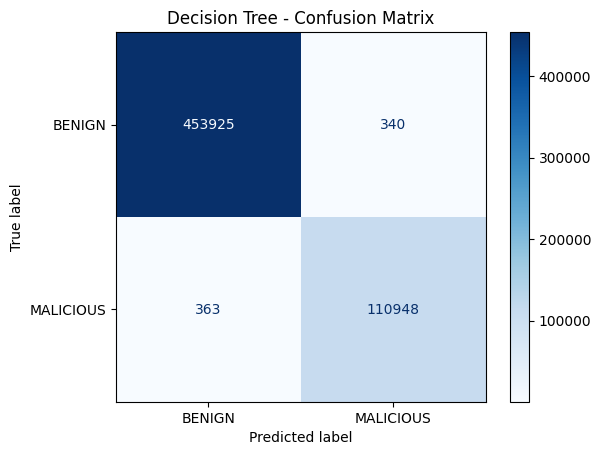

--- Logistic Regression ---
               precision    recall  f1-score   support

   BENIGN (0)       0.91      0.97      0.94    454265
MALICIOUS (1)       0.82      0.63      0.71    111311

     accuracy                           0.90    565576
    macro avg       0.86      0.80      0.82    565576
 weighted avg       0.89      0.90      0.89    565576



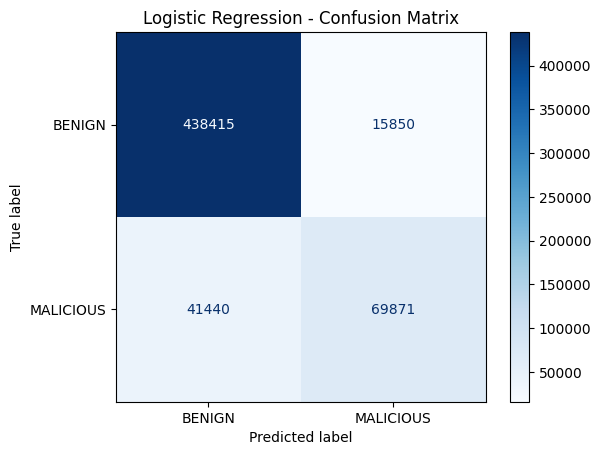

--- Random Forest ---
               precision    recall  f1-score   support

   BENIGN (0)       1.00      1.00      1.00    454265
MALICIOUS (1)       1.00      1.00      1.00    111311

     accuracy                           1.00    565576
    macro avg       1.00      1.00      1.00    565576
 weighted avg       1.00      1.00      1.00    565576



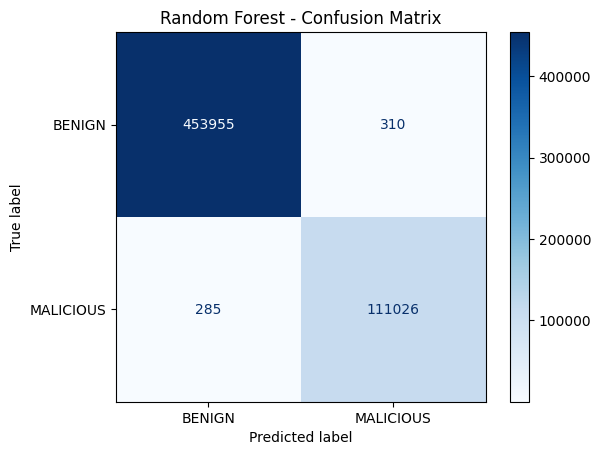

 All models trained and evaluated successfully!


In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print(" Training and evaluating models...")
print(f"Using {X_train_selected_scaled.shape[1]} selected features.\n")

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, n_jobs=-1, solver='saga'),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
}

for name, model in models.items():
    print(f"--- {name} ---")
    model.fit(X_train_selected_scaled, y_train)
    y_pred = model.predict(X_test_selected_scaled)

    print(classification_report(y_test, y_pred, target_names=['BENIGN (0)', 'MALICIOUS (1)']))
    cm = confusion_matrix(y_test, y_pred)

    ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['BENIGN', 'MALICIOUS']).plot(
        cmap=plt.cm.Blues, values_format='d'
    )
    plt.title(f"{name} - Confusion Matrix")
    plt.show()

print(" All models trained and evaluated successfully!")


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import os

print(f"Original dataset shape: {df.shape}")

malicious_df = df[df['Label'] != 'BENIGN'].copy()
print(f"Malicious-only dataset shape: {malicious_df.shape}")
print("Attack type counts:\n", malicious_df['Label'].value_counts())

output_filename_multi = 'cleaned/malicious_packets_only.csv'
print(f"\n Saving malicious-only dataset to '{output_filename_multi}'...")
malicious_df.to_csv(output_filename_multi, index=False)
print(f" Saved '{output_filename_multi}' ({os.path.getsize(output_filename_multi)/(1024*1024):.2f} MB)")

X_multi = malicious_df[adv_selector.selected_features_]
y_multi = malicious_df['Label']
print(f"\nX_multi shape: {X_multi.shape}")
print(f"y_multi shape: {y_multi.shape}")

label_encoder = LabelEncoder()
y_multi_encoded = label_encoder.fit_transform(y_multi)
print("\n--- Label Encoding ---")
for i, name in enumerate(label_encoder.classes_):
    print(f"{name.ljust(30)} ---> {i}")
print("----------------------")

X_multi_train, X_multi_test, y_multi_train, y_multi_test = train_test_split(
    X_multi, y_multi_encoded, test_size=0.2, random_state=42, stratify=y_multi_encoded
)

X_multi_train_scaled = scaler_selected_features.transform(X_multi_train)
X_multi_test_scaled = scaler_selected_features.transform(X_multi_test)

print("\n Model 2 data prepared successfully.")
print(f"Train shape: {X_multi_train_scaled.shape}")
print(f"Test shape:  {X_multi_test_scaled.shape}")


Original dataset shape: (2827876, 80)
Malicious-only dataset shape: (556556, 80)
Attack type counts:
 Label
DoS Hulk                        230124
PortScan                        158804
DDoS                            128025
DoS GoldenEye                    10293
FTP-Patator                       7935
SSH-Patator                       5897
DoS slowloris                     5796
DoS Slowhttptest                  5499
Bot                               1956
Web Attack ï¿½ Brute Force        1507
Web Attack ï¿½ XSS                 652
Infiltration                        36
Web Attack ï¿½ Sql Injection        21
Heartbleed                          11
Name: count, dtype: int64

 Saving malicious-only dataset to 'cleaned/malicious_packets_only.csv'...
 Saved 'cleaned/malicious_packets_only.csv' (187.18 MB)

X_multi shape: (556556, 40)
y_multi shape: (556556,)

--- Label Encoding ---
Bot                            ---> 0
DDoS                           ---> 1
DoS GoldenEye                  --->

Training Model 2 (Multi-Class Attack Classifier)...
Training on 445244 attack samples.


--- Training Model 2: Decision Tree ---
 Decision Tree trained successfully.

--- Evaluation Report for Decision Tree ---
                              precision    recall  f1-score   support

                         Bot       1.00      1.00      1.00       391
                        DDoS       1.00      1.00      1.00     25605
               DoS GoldenEye       0.99      1.00      0.99      2059
                    DoS Hulk       1.00      1.00      1.00     46025
            DoS Slowhttptest       0.99      0.99      0.99      1100
               DoS slowloris       0.99      0.99      0.99      1159
                 FTP-Patator       1.00      1.00      1.00      1587
                  Heartbleed       1.00      1.00      1.00         2
                Infiltration       1.00      0.86      0.92         7
                    PortScan       1.00      1.00      1.00     31761
                 S

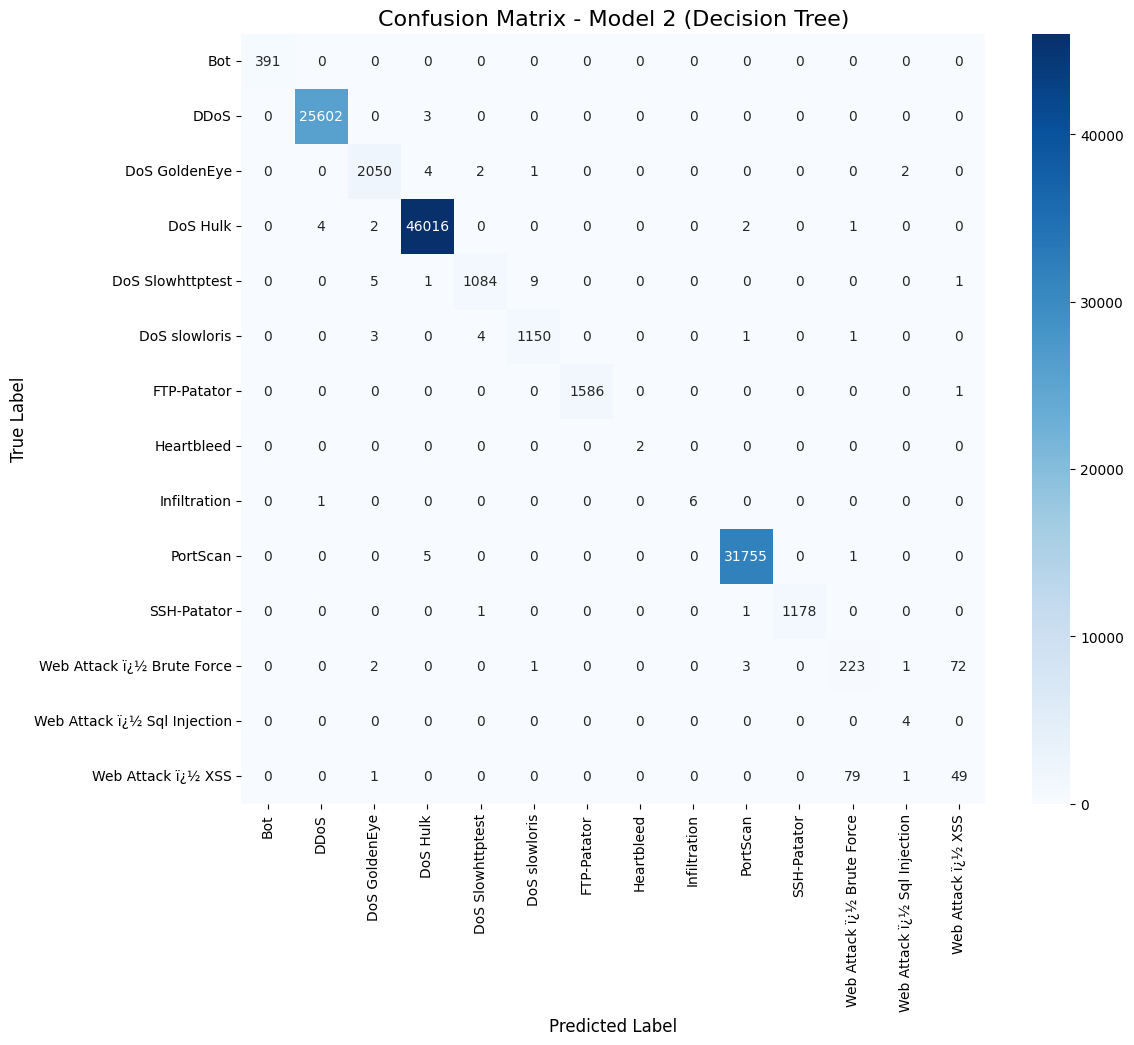



--- Training Model 2: Logistic Regression ---
 Logistic Regression trained successfully.

--- Evaluation Report for Logistic Regression ---
                              precision    recall  f1-score   support

                         Bot       1.00      0.25      0.40       391
                        DDoS       0.98      0.98      0.98     25605
               DoS GoldenEye       0.98      0.97      0.98      2059
                    DoS Hulk       0.96      0.99      0.97     46025
            DoS Slowhttptest       0.92      0.84      0.88      1100
               DoS slowloris       0.84      0.53      0.65      1159
                 FTP-Patator       0.96      0.49      0.65      1587
                  Heartbleed       0.00      0.00      0.00         2
                Infiltration       0.00      0.00      0.00         7
                    PortScan       0.98      1.00      0.99     31761
                 SSH-Patator       0.97      0.51      0.66      1180
  Web Attack ï¿½ 

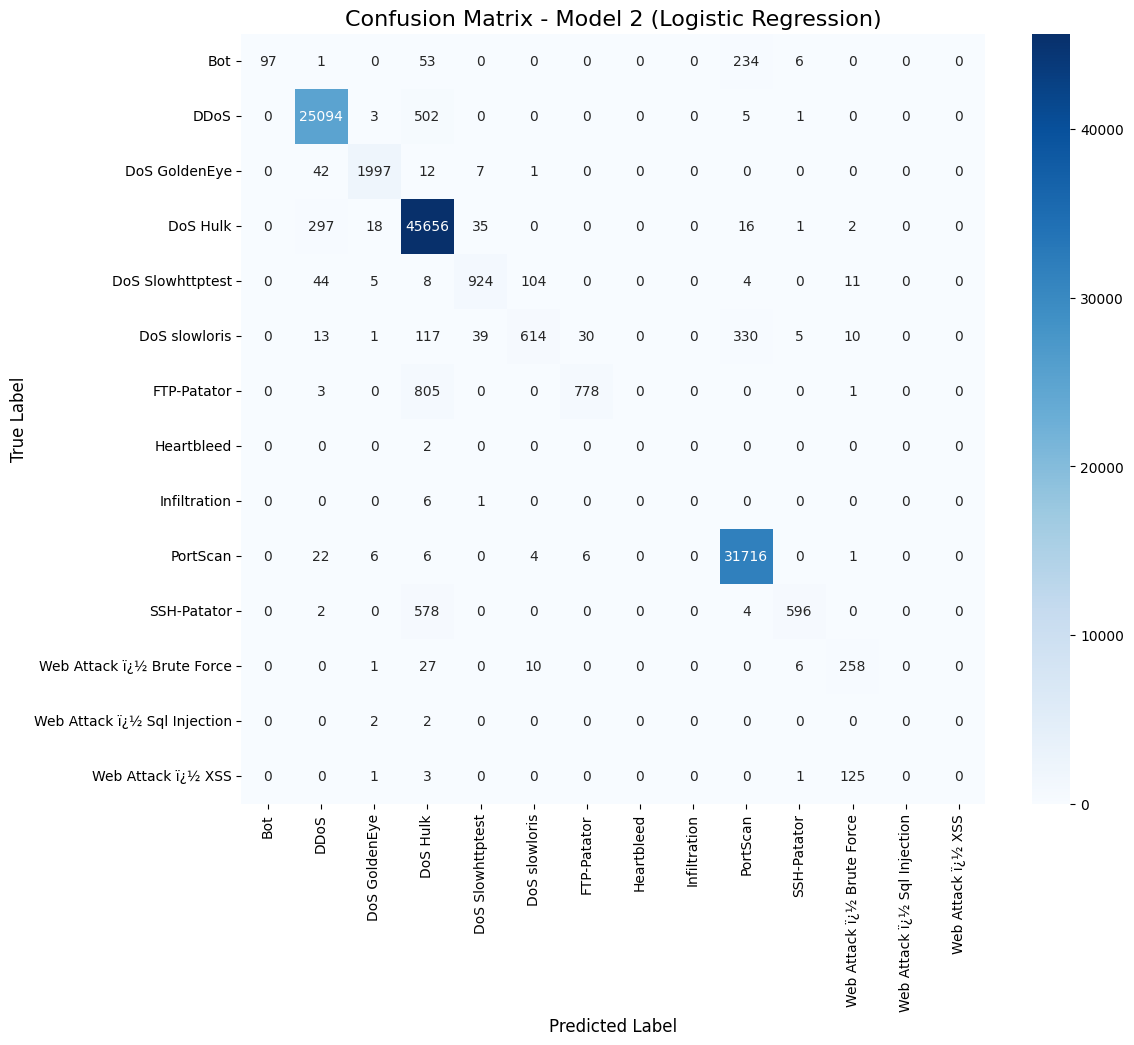



--- Training Model 2: Random Forest ---
 Random Forest trained successfully.

--- Evaluation Report for Random Forest ---
                              precision    recall  f1-score   support

                         Bot       1.00      1.00      1.00       391
                        DDoS       1.00      1.00      1.00     25605
               DoS GoldenEye       1.00      1.00      1.00      2059
                    DoS Hulk       1.00      1.00      1.00     46025
            DoS Slowhttptest       1.00      0.99      0.99      1100
               DoS slowloris       0.99      0.99      0.99      1159
                 FTP-Patator       1.00      1.00      1.00      1587
                  Heartbleed       1.00      1.00      1.00         2
                Infiltration       1.00      0.71      0.83         7
                    PortScan       1.00      1.00      1.00     31761
                 SSH-Patator       1.00      1.00      1.00      1180
  Web Attack ï¿½ Brute Force       

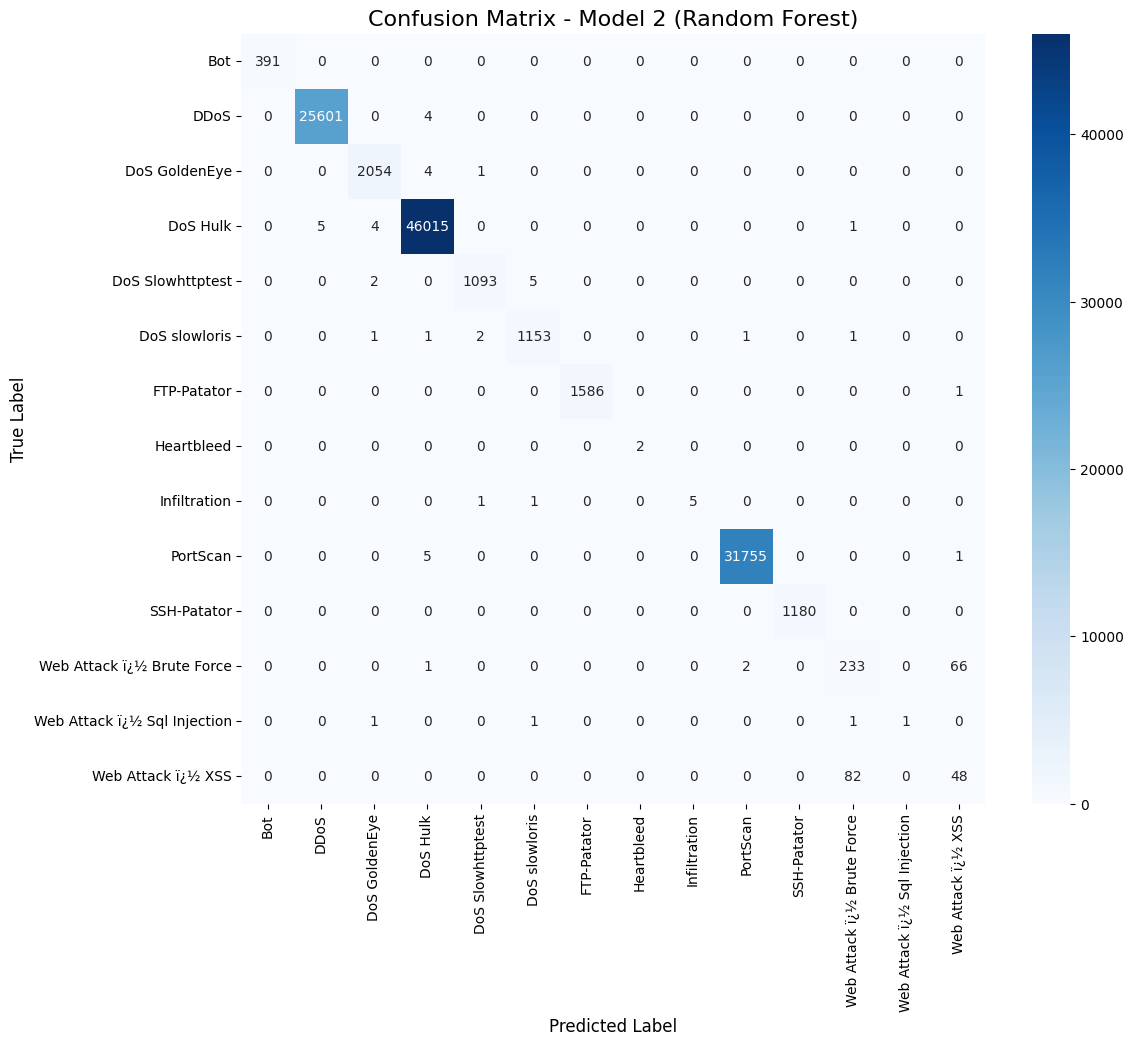

In [10]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("Training Model 2 (Multi-Class Attack Classifier)...")
print(f"Training on {X_multi_train_scaled.shape[0]} attack samples.")

models_multi = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, n_jobs=-1, solver='saga', max_iter=1000),
    "Random Forest": RandomForestClassifier(random_state=42, n_jobs=-1, n_estimators=100)
}

target_names = label_encoder.classes_

for name, model in models_multi.items():
    print(f"\n\n--- Training Model 2: {name} ---")
    model.fit(X_multi_train_scaled, y_multi_train)
    print(f" {name} trained successfully.")

    y_multi_pred = model.predict(X_multi_test_scaled)

    print(f"\n--- Evaluation Report for {name} ---")
    print(classification_report(y_multi_test, y_multi_pred, target_names=target_names))

    print(f"\n--- Confusion Matrix for {name} ---")
    cm_multi = confusion_matrix(y_multi_test, y_multi_pred)

    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_multi, annot=True, fmt='d', cmap='Blues',
                xticklabels=target_names, yticklabels=target_names)
    plt.title(f'Confusion Matrix - Model 2 ({name})', fontsize=16)
    plt.xlabel('Predicted Label', fontsize=12)
    plt.ylabel('True Label', fontsize=12)
    plt.show()
